#**Cross Validation**

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

The three steps involved in cross-validation are as follows :
* Reserve some portion of sample data-set.
* Using the rest data-set train the model.
* Test the model using the reserve portion of the data-set.

Methods of Cross Validation

* ***Validation***

In this method, we perform training on the 50% of the given data-set and rest 50% is used for the testing purpose. The major drawback of this method is that we perform training on the 50% of the dataset, it may possible that the remaining 50% of the data contains some important information which we are leaving while training our model i.e higher bias.

* ***LOOCV (Leave One Out Cross Validation)***

In this method, we perform training on the whole data-set but leaves only one data-point of the available data-set and then iterates for each data-point. It has some advantages as well as disadvantages also.
An advantage of using this method is that we make use of all data points and hence it is low bias.
The major drawback of this method is that it leads to higher variation in the testing model as we are testing against one data point. If the data point is an outlier it can lead to higher variation. Another drawback is it takes a lot of execution time as it iterates over ‘the number of data points’ times.

* ***K-Fold Cross Validation***

In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model. In this method, we iterate k times with a different subset reserved for testing purpose each time.

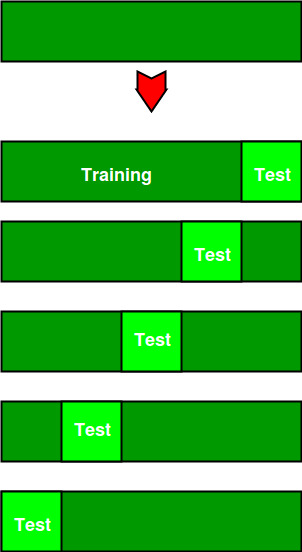

***When should you use cross-validation?***

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take longer to run, because it estimates multiple models (one for each fold).

So, given these tradeoffs, when should you use each approach?

* For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
* For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
* There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

In [ ]:
# importing cross-validation from sklearn package. 
from sklearn import cross_validation 

# value of K is 10. 
data = cross_validation.KFold(len(train_set), n_folds=10, indices=False) 


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_train.shape, y_train.shape
X_test.shape, y_test.shape
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:

from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores


array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

##**1-Leave-one-out Cross-Validation (LOOCV):**

This is very old technique which is replaced by k-fold and stratified k-fold but still useful in certain scenarios. Data is partitioned into blocks representing each with 1 record as test while remaining as train. Each and every record is treated as test and those many iterations to evaluate on each.

Let’s pitch an example.
Data of 20 records means 20 partitions, each having one record. This leads to 20 iterations of training and evaluating.


##**2-Leave-p-out cross-validation**

Leave-p-out cross-validation (LpO CV) involves using p observations as the validation set and the remaining observations as the training set. This is repeated on all ways to cut the original sample on a validation set of p observations and a training set.

A variant of LpO cross-validation with p=2 known as leave-pair-out cross-validation has been recommended as a nearly unbiased method for estimating the area under ROC curve of binary classifiers

##**3-K-Fold Cross-Validation:**

A variant of cross-validation where data is divided into partitions as train/test based on “K”. Here, K refers to any integer while fold is to a partition (or iteration). Model performs training on K-1 partitions and testing on Kth partition of data.

Example for 4-fold cross validation,
Data of 20 records, given 4-fold. Data is divided into 4 partitions. Each partition has (20/4=)5 records.


##**4-Stratified K-Fold Cross-Validation:**

This is an improved version of K-Fold where now each fold has same percent of samples of each target class.

 Let’s say binary classification having dependent classes 1/0. Things will go wrong when only records of class 1 fall into test set and model is trained and evaluated, results into data imbalance situation. Thus, stratified comes into picture.

##**5-kl-fold cross-validation**

This is a truly nested variant  which contains an outer loop of k sets and an inner loop of l sets. The total data set is split into k sets. One by one, a set is selected as the (outer) test set and the k - 1 other sets are combined into the corresponding outer training set. This is repeated for each of the k sets. 

Each outer training set is further sub-divided into l sets. One by one, a set is selected as inner test (validation) set and the l - 1 other sets are combined into the corresponding inner training set. This is repeated for each of the l sets. The inner training sets are used to fit model parameters, while the outer test set is used as a validation set to provide an unbiased evaluation of the model fit. 

Typically, this is repeated for many different hyperparameters (or even different model types) and the validation set is used to determine the best hyperparameter set (and model type) for this inner training set. After this, a new model is fit on the entire outer training set, using the best set of hyperparameters from the inner cross-validation. The performance of this model is then evaluated using the outer test set.